In [1]:
from estimation.struct_estimation.start_params.set_start_params import (
    load_and_set_start_params,
)
from specs.derive_specs import generate_derived_and_data_derived_specs
from set_paths import create_path_dict
from model_code.specify_model import specify_model
from model_code.stochastic_processes.policy_states_belief import (
    expected_SRA_probs_estimation,
)
from model_code.stochastic_processes.policy_states_belief import (
    update_specs_exp_ret_age_trans_mat,
)
import pickle as pkl
from estimation.struct_estimation.estimate_setup import create_unobserved_state_specs
from export_results.figures.observed_model_fit import load_and_prep_data_for_model_fit, plot_observed_model_fit_choice_probs

In [2]:
paths_dict = create_path_dict(define_user=False)
specs = generate_derived_and_data_derived_specs(paths_dict)
start_params_all = load_and_set_start_params(paths_dict)
start_params_all["bequest_scale"] = 1

Optimization terminated successfully.
         Current function value: 0.570576
         Iterations 5


In [3]:
# Generate model_specs
model, start_params_all = specify_model(
    path_dict=paths_dict,
    update_spec_for_policy_state=update_specs_exp_ret_age_trans_mat,
    policy_state_trans_func=expected_SRA_probs_estimation,
    params=start_params_all,
    load_model=True,
)

Update function for state space not given. Assume states only change with an increase of the period and lagged choice.
Model specified.


In [4]:
data_decision, states_dict = load_and_prep_data_for_model_fit(paths_dict, specs, start_params_all, model)

In [5]:
unobserved_state_specs = create_unobserved_state_specs(data_decision, model)

{'dis_util_ft_work_high': 1.3, 'dis_util_ft_work_low': 1.3, 'dis_util_pt_work_high': 1.3, 'dis_util_pt_work_low': 1.3, 'dis_util_unemployed_high': 1.0, 'dis_util_unemployed_low': 1.0, 'job_finding_logit_const': 0.6221201079628091, 'job_finding_logit_age': -0.03576746835296977, 'job_finding_logit_high_educ': 0.43996573010449497}
23277.03034741828


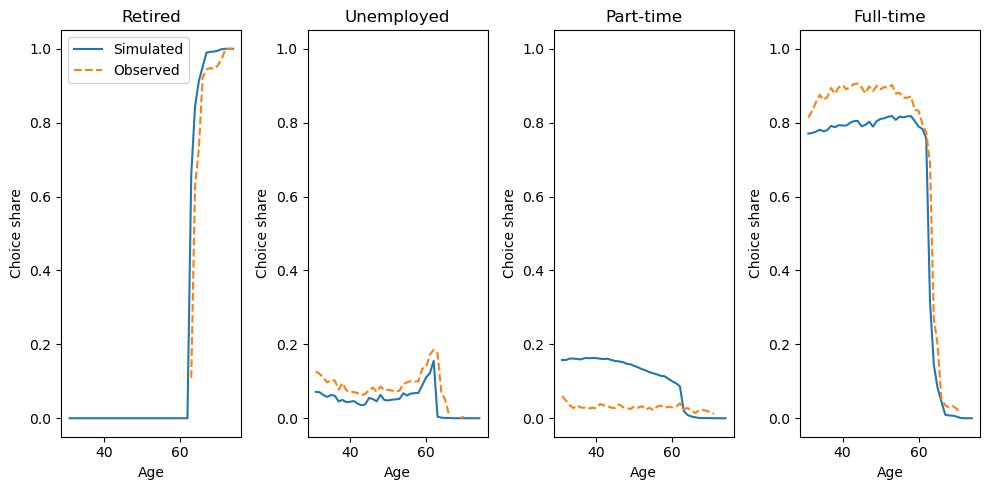

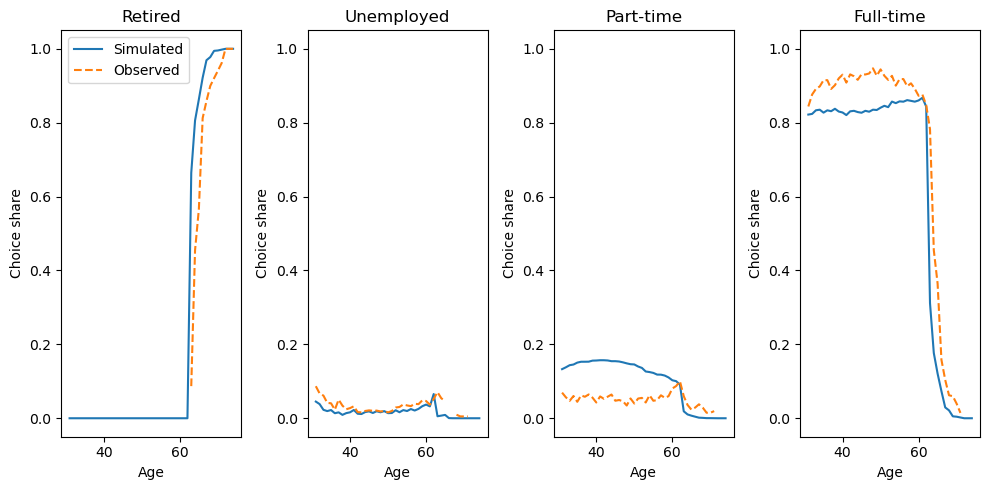

In [6]:
log_object = pkl.load(open(paths_dict["intermediate_est_data"] + "solving_log.pkl", "rb"))
print(log_object["params"])
print(log_object["ll_value"])

start_params_all.update(log_object["params"])
plot_observed_model_fit_choice_probs(
    paths_dict,
    specs,
    data_decision,
    states_dict,
    model,
    unobserved_state_specs,
    start_params_all,
    log_object["model_sol"],
    save_fig=False,
)